In [1]:
%pip install memory_profiler

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%load_ext memory_profiler

In [3]:
import tensorflow as tf
from IPython.display import Image

In [4]:
tf.__version__

'2.13.0-rc1'

# Insert TF baseline

# No Activation

In [5]:
inp = tf.keras.Input(shape=(32,))

x = inp

for i in range(250):
  x = tf.keras.layers.Dense(10)(x)

m = tf.keras.Model(inp, x)

m.save('no_activation')

2023-06-28 17:19:29.044076: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:19:29.044101: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:19:29.044106: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:19:29.044135: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:19:29.044149: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


INFO:tensorflow:Assets written to: no_activation/assets


INFO:tensorflow:Assets written to: no_activation/assets


In [6]:
%%writefile load_no_activation.py

import tensorflow as tf
tf.saved_model.load('no_activation')

Writing load_no_activation.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:19:49.948814: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:19:49.948840: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:19:49.948847: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:19:49.948878: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:19:49.948892: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Using last profile data.


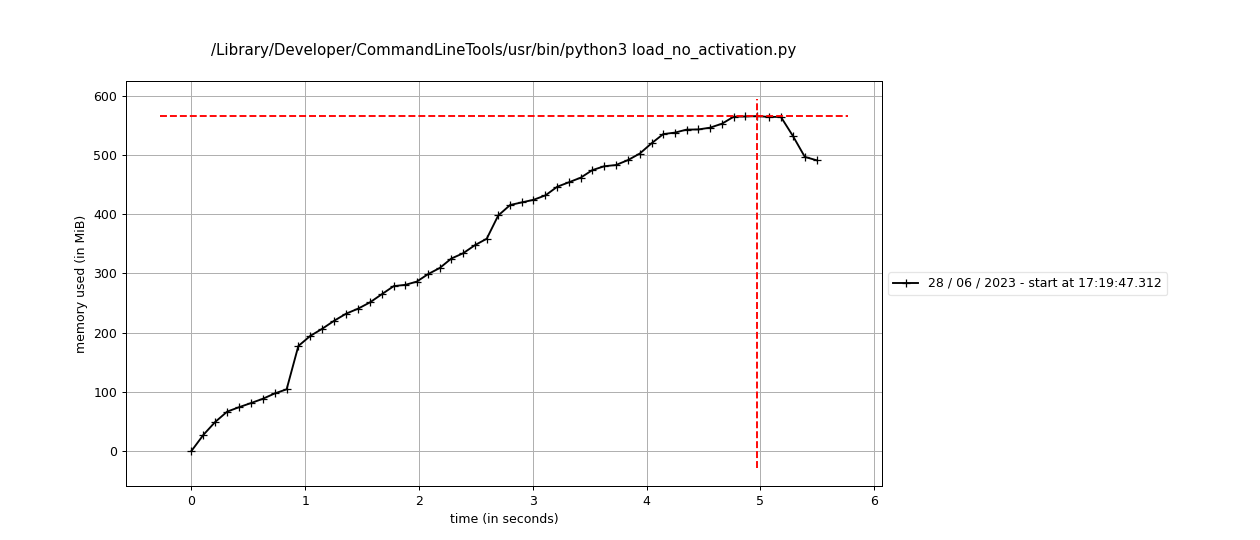

In [7]:
!mprof run load_no_activation.py
!mprof plot -o no_activation.png
Image(filename='no_activation.png')

# Internal Activation inside Dense function

In [8]:
inp = tf.keras.Input(shape=(32,))

x = inp

for i in range(250):
  x = tf.keras.layers.Dense(10, activation=tf.keras.activations.sigmoid)(x)

m = tf.keras.Model(inp, x)

m.save('internal_activation')

INFO:tensorflow:Assets written to: internal_activation/assets


INFO:tensorflow:Assets written to: internal_activation/assets


In [9]:
%%writefile load_internal_activation.py

import tensorflow as tf
tf.saved_model.load('internal_activation')

Writing load_internal_activation.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:26:41.059824: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:26:41.059850: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:26:41.059855: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:26:41.059887: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:26:41.059903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Using last profile data.


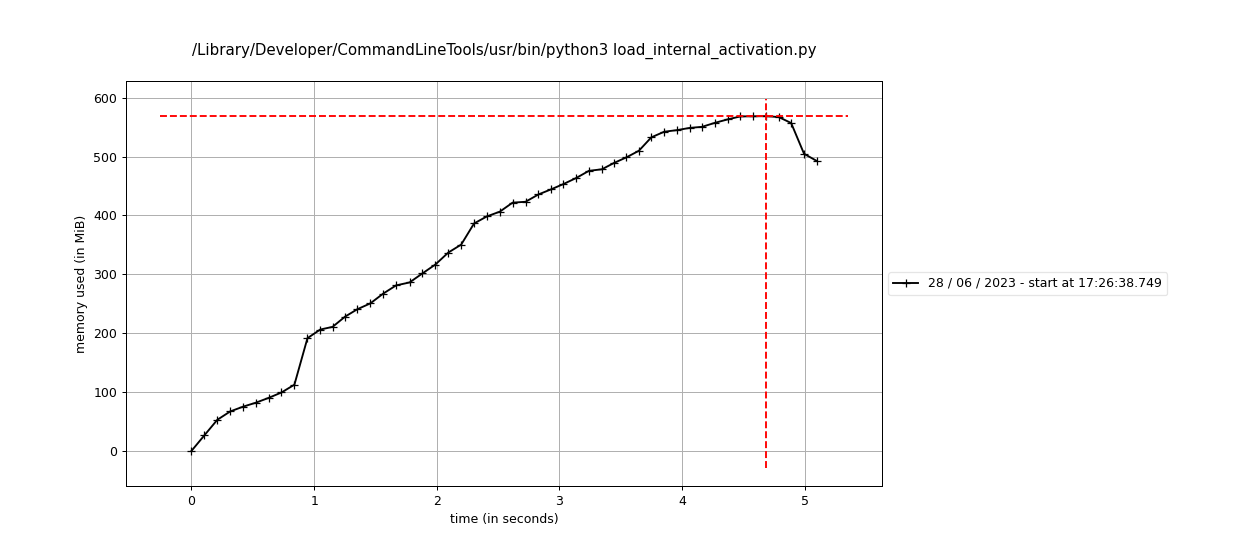

In [10]:
!mprof run load_internal_activation.py
!mprof plot -o internal_activation.png
Image(filename='internal_activation.png')

# External Activation with added layer

In [11]:
inp = tf.keras.Input(shape=(32,))

x = inp

for i in range(250):
  x = tf.keras.layers.Dense(10)(x)
  x = tf.keras.layers.Activation('sigmoid')(x)

m = tf.keras.Model(inp, x)

m.save('external_activation')

INFO:tensorflow:Assets written to: external_activation/assets


INFO:tensorflow:Assets written to: external_activation/assets


In [12]:
%%writefile load_external_activation.py

import tensorflow as tf
tf.saved_model.load('external_activation')

Writing load_external_activation.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:27:52.230656: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:27:52.230687: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:27:52.230697: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:27:52.230728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:27:52.230743: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Traceback (most recent call last):
  File "/Users/cherry/Library/Python/3.9/lib/python/site-pack

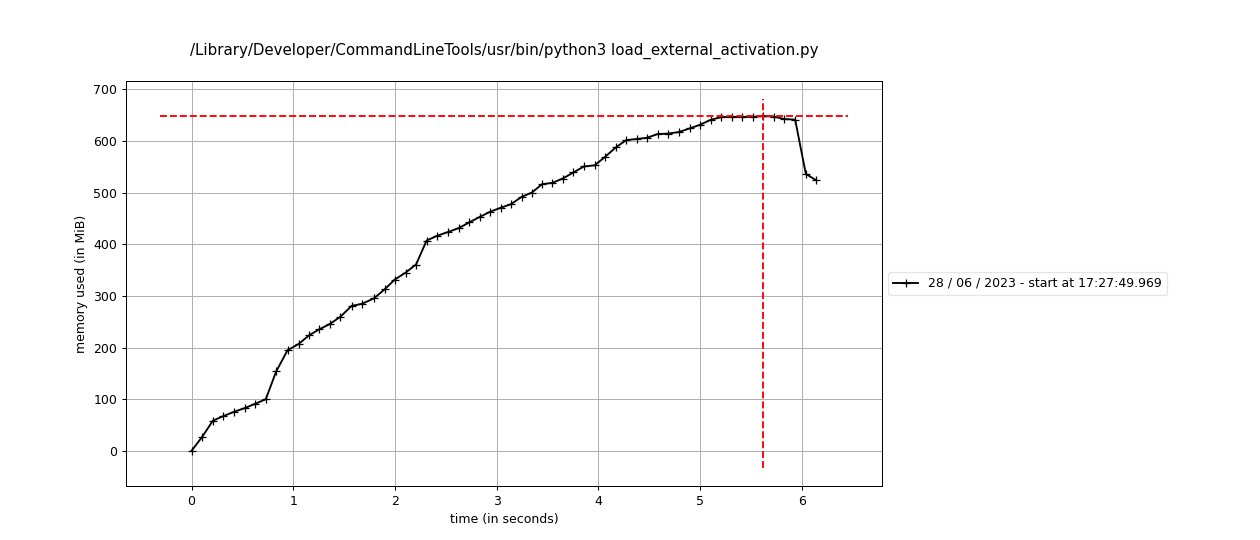

In [13]:
!mprof run load_external_activation.py
!mprof plot -o external_activation.png
Image(filename='external_activation.png')

# Sequential

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(32,)))
for i in range(249):
  model.add(tf.keras.layers.Dense(10))


model.save("sequential")

INFO:tensorflow:Assets written to: sequential/assets


INFO:tensorflow:Assets written to: sequential/assets


In [15]:
%%writefile sequential.py

import tensorflow as tf
tf.saved_model.load('sequential')

Writing sequential.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:29:05.652994: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:29:05.653029: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:29:05.653036: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:29:05.653073: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:29:05.653089: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Traceback (most recent call last):
  File "/Users/cherry/Library/Python/3.9/lib/python/site-pack

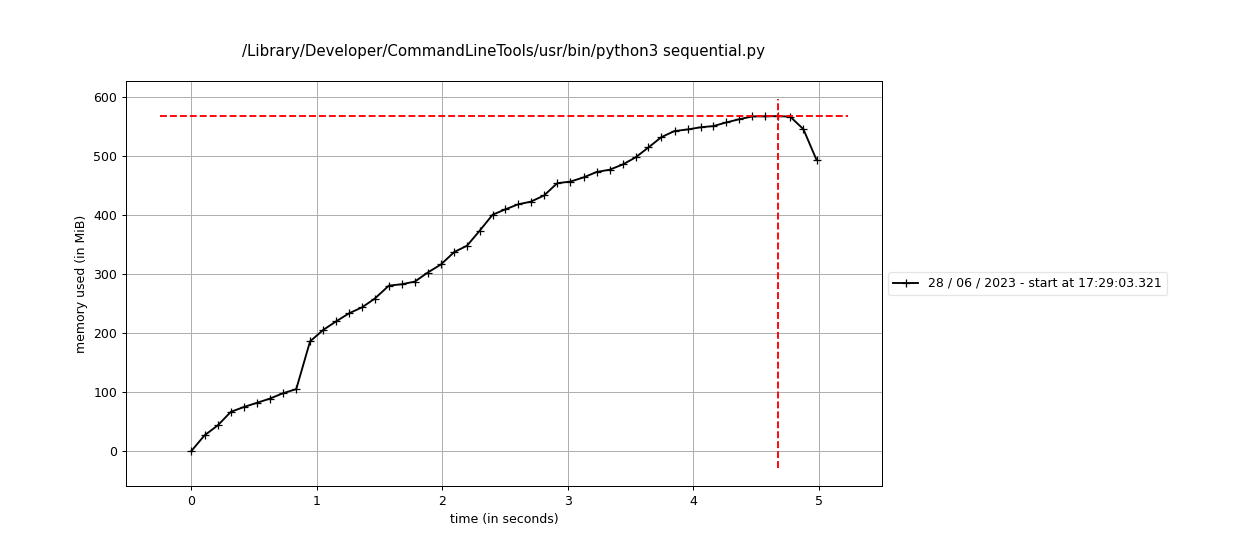

In [16]:
!mprof run sequential.py
!mprof plot -o sequential.png
Image(filename='sequential.png')

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=(32,), activation='sigmoid'))
for i in range(249):
  model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

model.save("sequential_with_activation_as_arg")

INFO:tensorflow:Assets written to: sequential_with_activation_as_arg/assets


INFO:tensorflow:Assets written to: sequential_with_activation_as_arg/assets


In [33]:
%%writefile sequential_with_activation_as_arg.py

import tensorflow as tf
tf.saved_model.load('sequential_with_activation_as_arg')

Writing sequential_with_activation_as_arg.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:48:15.084057: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:48:15.084085: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:48:15.084091: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:48:15.084122: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:48:15.084138: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Traceback (most recent call last):
  File "/Users/cherry/Library/Python/3.9/lib/python/site-pack

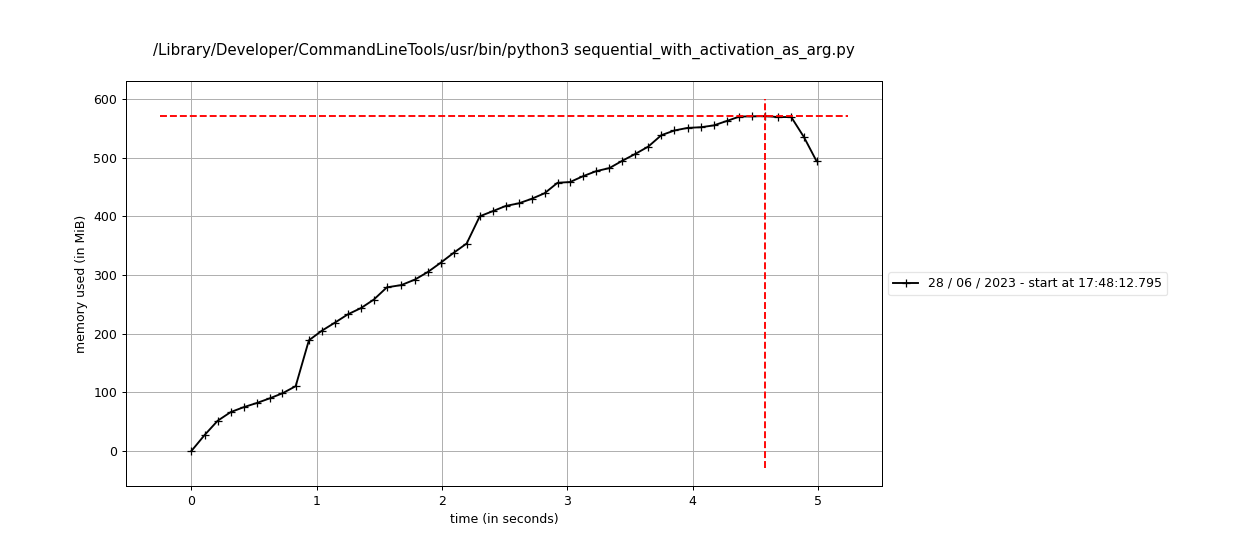

In [38]:
!mprof run sequential_with_activation_as_arg.py
!mprof plot -o sequential_with_activation_as_arg.png
Image(filename='sequential_with_activation_as_arg.png')

## Custom Dense:

In [34]:
class MyDenseWithActivation(tf.keras.layers.Dense):
  def call(self, inputs):
    return tf.sigmoid(super().call(inputs))

inp = tf.keras.Input(shape=(32,))

x = inp

for i in range(250):
  x = MyDenseWithActivation(10)(x)

m = tf.keras.Model(inp, x)

m.save('custom')

INFO:tensorflow:Assets written to: custom/assets


INFO:tensorflow:Assets written to: custom/assets


In [35]:
%%writefile custom.py

import tensorflow as tf
tf.saved_model.load('custom')

Overwriting custom.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:47:29.755148: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:47:29.755174: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:47:29.755181: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:47:29.755210: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:47:29.755227: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Using last profile data.


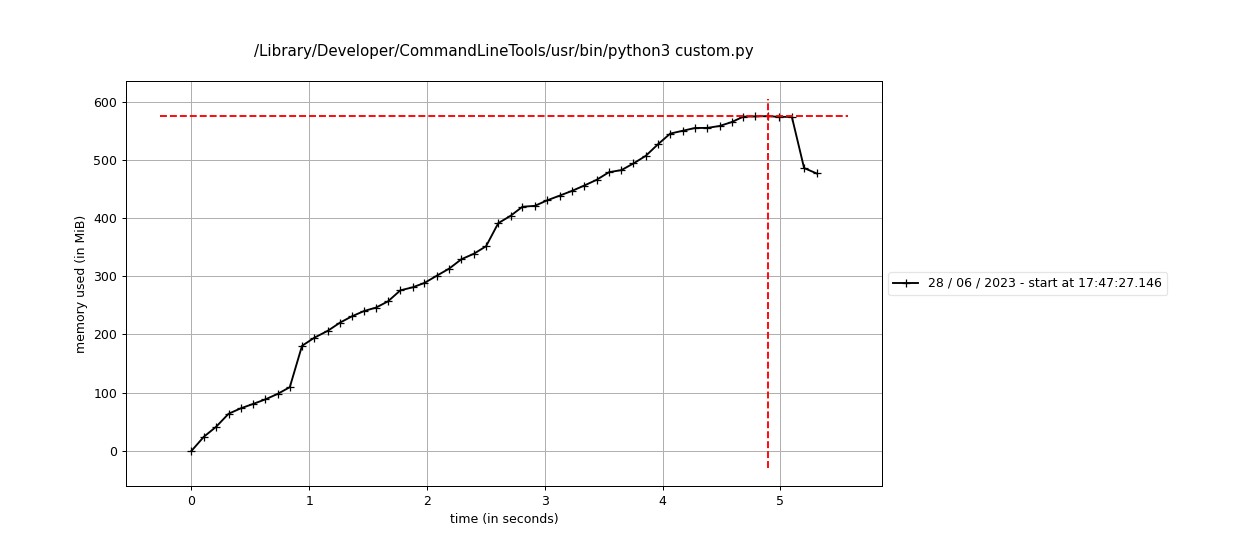

In [36]:
!mprof run custom.py
!mprof plot -o custom.png
Image(filename='custom.png')

In [37]:
class MyDenseWithActivation(tf.keras.layers.Dense):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.activation = tf.keras.layers.Activation('sigmoid')
  def call(self, inputs):
    return self.activation(super().call(inputs))

inp = tf.keras.Input(shape=(32,))

x = inp

for i in range(250):
  x = MyDenseWithActivation(10)(x)

m = tf.keras.Model(inp, x)

m.save('custom_with_layer_inside')

Exception ignored in: <function ConcreteFunctionGarbageCollector.__del__ at 0x12ffba160>
Traceback (most recent call last):
  File "/Users/cherry/Library/Python/3.9/lib/python/site-packages/tensorflow/python/eager/polymorphic_function/monomorphic_function.py", line 1892, in __del__
    def __del__(self):
KeyboardInterrupt: 


INFO:tensorflow:Assets written to: custom_with_layer_inside/assets


INFO:tensorflow:Assets written to: custom_with_layer_inside/assets


In [ ]:
%%writefile custom_with_layer_inside.py

import tensorflow as tf
tf.saved_model.load('custom_with_layer_inside')

Writing custom_with_layer_inside.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:32:23.986365: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:32:23.986393: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:32:23.986399: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:32:23.986435: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:32:23.986452: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Using last profile data.


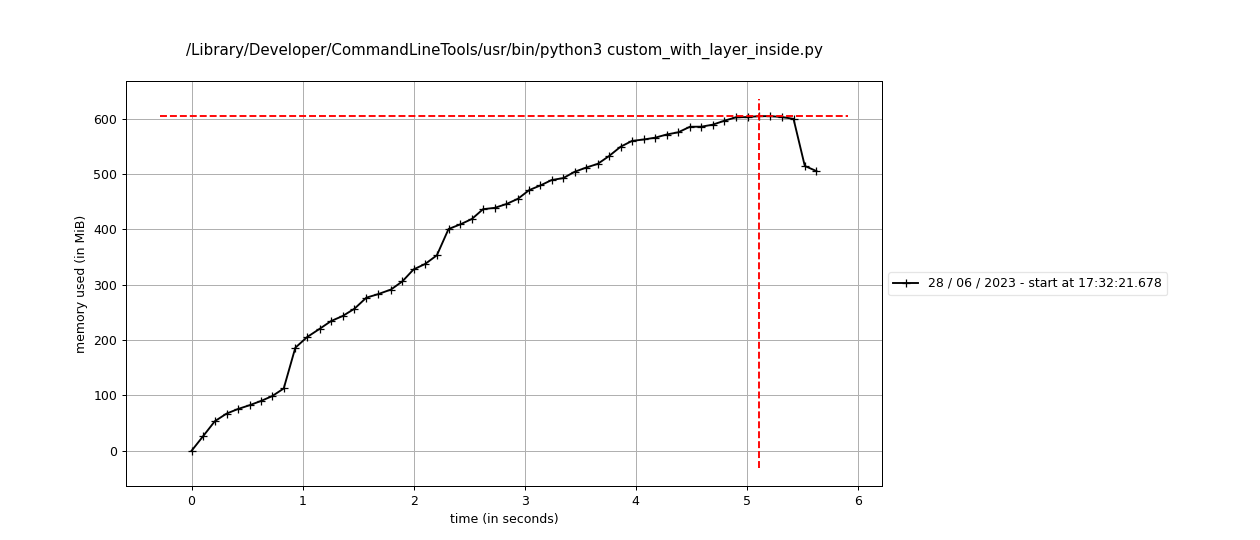

In [ ]:
!mprof run custom_with_layer_inside.py
!mprof plot -o custom_with_layer_inside.png
Image(filename='custom_with_layer_inside.png')

In [ ]:
class MyDenseWithActivation(tf.keras.layers.Layer):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.denses = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='sigmoid') for _ in range(250)])
  def call(self, inputs):
    return self.denses(inputs)

inp = tf.keras.Input(shape=(32,))

x = inp

x = MyDenseWithActivation()(x)

m = tf.keras.Model(inp, x)

m.save('custom_with_layer_inside')

INFO:tensorflow:Assets written to: custom_with_layer_inside/assets


INFO:tensorflow:Assets written to: custom_with_layer_inside/assets


In [ ]:
j = m.layers[1]

In [ ]:
len(j.trainable_variables)

500

In [ ]:
%%writefile custom_with_layer_inside.py

import tensorflow as tf
tf.saved_model.load('custom_with_layer_inside')

Overwriting custom_with_layer_inside.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:34:31.571601: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:34:31.571629: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:34:31.571636: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:34:31.571666: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:34:31.571684: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
Using last profile data.


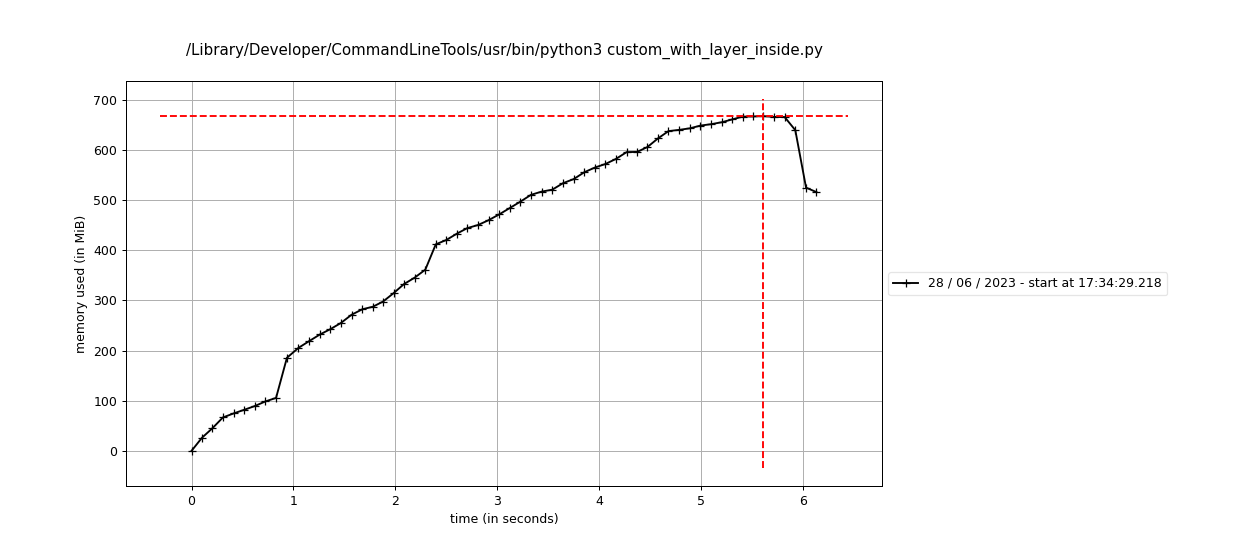

In [ ]:
!mprof run custom_with_layer_inside.py
!mprof plot -o custom_with_layer_inside.png
Image(filename='custom_with_layer_inside.png')

In [ ]:
class MyDenseWithActivation(tf.keras.layers.Layer):
  def __init__(self, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.denses = [tf.keras.layers.Dense(10, activation='sigmoid') for _ in range(250)]
  def call(self, inputs):
    out = inputs
    for deep in self.denses:
      out = deep(out)
    return out

inp = tf.keras.Input(shape=(32,))

x = inp

x = MyDenseWithActivation()(x)

m = tf.keras.Model(inp, x)

m.save('custom_with_layer_inside')

INFO:tensorflow:Assets written to: custom_with_layer_inside/assets


INFO:tensorflow:Assets written to: custom_with_layer_inside/assets


In [ ]:
m.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32)]              0         
                                                                 
 my_dense_with_activation_5  (None, 10)                27720     
 01 (MyDenseWithActivation)                                      
                                                                 
Total params: 27720 (108.28 KB)
Trainable params: 27720 (108.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
%%writefile custom_with_layer_inside.py

import tensorflow as tf
m = tf.saved_model.load('custom_with_layer_inside')
print(m([[0]* 32]))

Overwriting custom_with_layer_inside.py


mprof: Sampling memory every 0.1s
running new process
running as a Python program...
2023-06-28 17:37:08.292923: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-06-28 17:37:08.292948: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-06-28 17:37:08.292954: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-06-28 17:37:08.292987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-06-28 17:37:08.293002: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-06-28 17:37:10.124034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registr

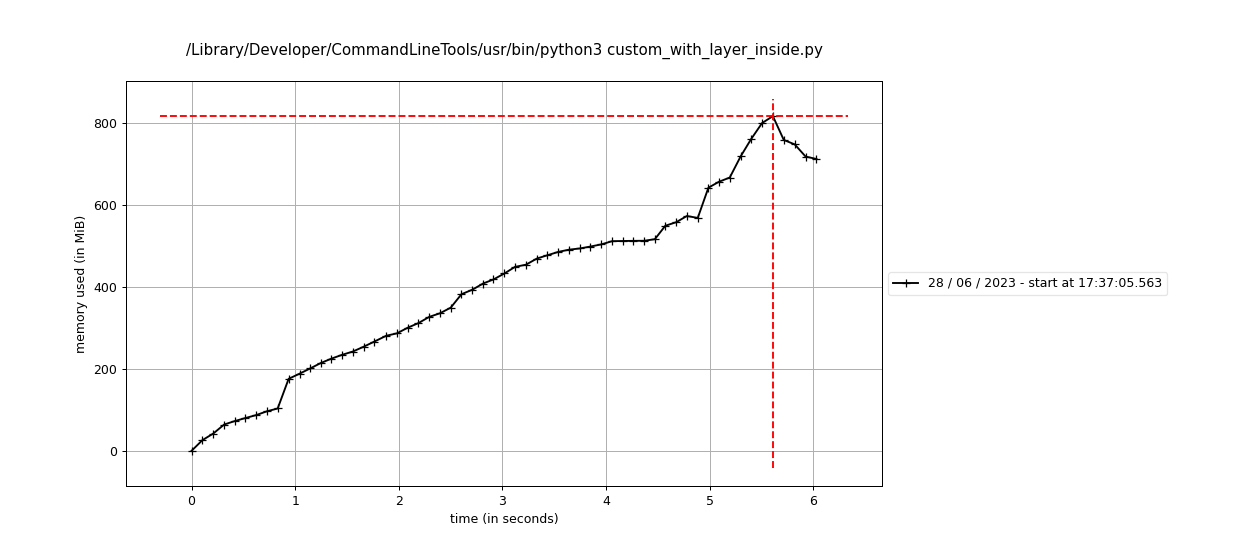

In [ ]:
!mprof run custom_with_layer_inside.py
!mprof plot -o custom_with_layer_inside.png
Image(filename='custom_with_layer_inside.png')